**JAMILATUR RIZQIL YASIRI - G.211.21.0088**

In [1]:
# Import library
import datetime
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Import Data dari File Manager Kita
from google.colab import files
uploaded = files.upload()

Saving retail_raw_reduced.csv to retail_raw_reduced.csv


In [5]:
# Load Dataset

data = pd.read_csv('retail_raw_reduced.csv')
data.head(20)

,order_id,order_date,customer_id,city,province,product_id,brand,quantity,item_price
0,1703458,2019-10-17,14004,Jakarta Selatan,DKI Jakarta,P1910,BRAND_J,10,740000
1,1706815,2019-10-24,17220,Jakarta Selatan,DKI Jakarta,P2934,BRAND_R,2,604000
2,1710718,2019-11-03,16518,Jakarta Utara,DKI Jakarta,P0908,BRAND_C,8,1045000
3,1683592,2019-08-19,16364,Jakarta Barat,DKI Jakarta,P0128,BRAND_A,4,205000
4,1702573,2019-10-16,15696,Jakarta Timur,DKI Jakarta,P2968,BRAND_R,2,4475000
5,1672906,2019-07-16,12748,Jakarta Utara,DKI Jakarta,P0710,BRAND_C,4,520000
6,1711399,2019-11-04,16791,Jakarta Barat,DKI Jakarta,P0860,BRAND_C,1,1465000
7,1695367,2019-09-26,13069,Surakarta,Jawa Tengah,P3342,BRAND_S,2,205000
8,1741846,2019-12-30,16873,Jakarta Barat,DKI Jakarta,P3203,BRAND_S,32,450000
9,1720189,2019-11-24,14723,Tangerang,Banten,P1701,BRAND_H,2,149000


In [7]:
import datetime

# Fungsi untuk mengubah format tanggal
def convert_to_month(date_string):
    date_obj = datetime.datetime.strptime(date_string, "%Y-%m-%d")
    return date_obj.strftime('%Y-%m')

# Membuat kolom order month pada dataset
data['order_month'] = data['order_date'].apply(convert_to_month)


In [8]:
#Membuat kolom GMV
data['gmv'] = data['item_price'] * data['quantity']

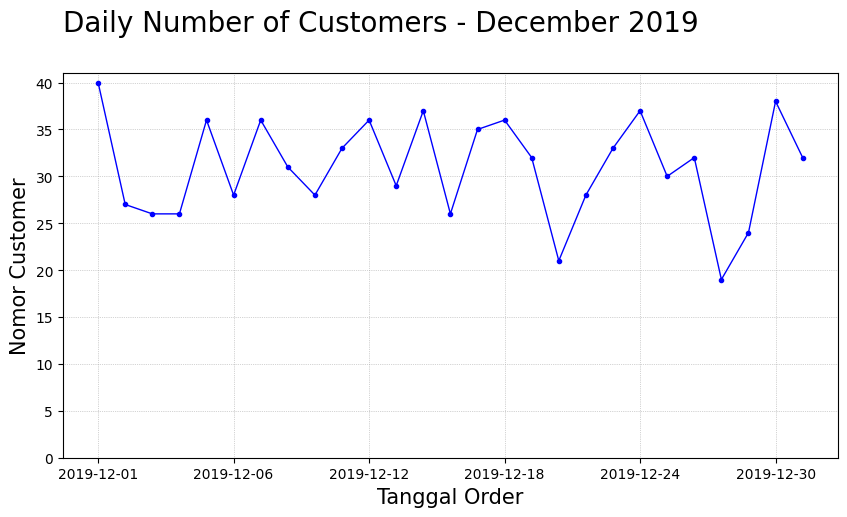

In [23]:
# Filter dataset untuk bulan Desember 2019
december_2019_data = data[data['order_month'] == '2019-12']

# Mengelompokkan jumlah pelanggan harian
daily_customers = december_2019_data.groupby(['order_date'])['customer_id'].nunique()

# Membuat plot grafik
plt.figure(figsize=(10, 5))
daily_customers.plot(color='blue', marker='.', linewidth=1)
plt.title('Daily Number of Customers - December 2019', loc='left', pad=30, fontsize=20, color='black')
plt.xlabel('Tanggal Order', fontsize=15, color='black')
plt.ylabel('Nomor Customer', fontsize=15, color='black')
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)

# Menampilkan grafik
plt.show()

Case 1:
Buat variabel baru (e.g. dataset_top5brand_dec) yang berisi data penjualan bulan Desember 2019

In [19]:
# Mencari top 5 brand pada bulan Desember 2019
top_brands = (data[data['order_month'] == '2019-12']
                .groupby('brand')['quantity']
                .sum()
                .reset_index()
                .sort_values(by='quantity', ascending=False)
                .head(5))

# Membuat dataset baru berisi data untuk top 5 brand pada bulan Desember 2019
data_top5brand_dec = data[(data['order_month'] == '2019-12') & (data['brand'].isin(top_brands['brand'].to_list()))]

# Menampilkan top 5 brand
print(top_brands)


     brand  quantity
8  BRAND_S      2197
6  BRAND_P      2194
7  BRAND_R      1508
2  BRAND_C      1365
0  BRAND_A      1315


Case 2: Multi-line chart daily quantity untuk brand top 5

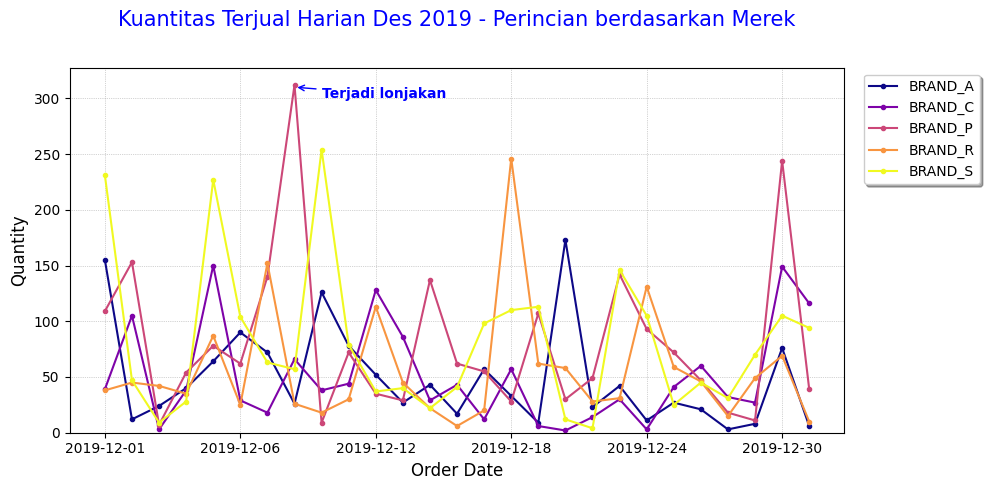

In [25]:
# Mengelompokkan jumlah barang harian berdasarkan tanggal dan brand, kemudian membuat multi-line chart
data_top5brand_dec.groupby(['order_date', 'brand'])['quantity'].sum().unstack().plot(marker='.', cmap='plasma')

# Menambahkan judul dan label sumbu
plt.title('Kuantitas Terjual Harian Des 2019 - Perincian berdasarkan Merek', loc='center', pad=30, fontsize=15, color='blue')
plt.xlabel('Order Date', fontsize=12)
plt.ylabel('Quantity', fontsize=12)

# Menambahkan grid
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)

# Mengatur batas minimal pada sumbu y
plt.ylim(ymin=0)

# Menampilkan legenda di lokasi yang ditentukan
plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1), shadow=True, ncol=1)

# Menambahkan annotation dengan panah pada grafik
plt.annotate('Terjadi lonjakan', xy=(7, 310), xytext=(8, 300),
                weight='bold', color='blue',
                arrowprops=dict(arrowstyle='->',
                                connectionstyle="arc3",
                                color='blue'))

# Mengatur ukuran gambar
plt.gcf().set_size_inches(10, 5)

# Menampilkan grafik
plt.tight_layout()
plt.show()

Case 3:
Cari tahu jumlah product untuk masing-masing brand yang laku selama bulan Desember 2019

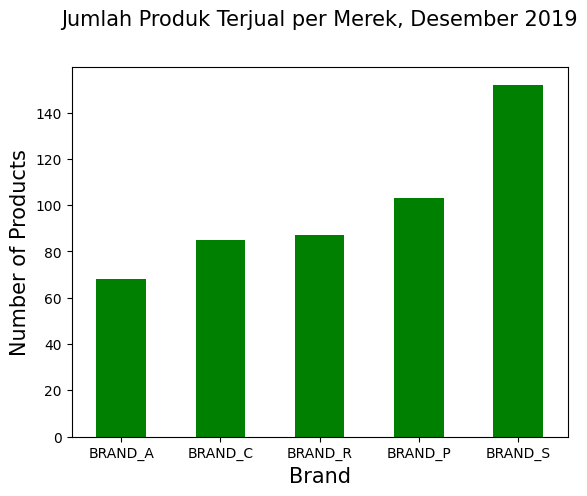

In [33]:
# Membersihkan plot sebelum membuat yang baru
plt.clf()

# Mengelompokkan jumlah produk terjual per brand
sold_products_per_brand = data_top5brand_dec.groupby('brand')['product_id'].nunique().sort_values(ascending=True)

# Membuat bar chart
sold_products_per_brand.plot(kind='bar', color='green')

# Menambahkan judul dan label sumbu
plt.title('Jumlah Produk Terjual per Merek, Desember 2019', loc='center', pad=30, fontsize=15, color='black')
plt.xlabel('Brand', fontsize=15)
plt.ylabel('Number of Products', fontsize=15)

# Mengatur batas minimal pada sumbu y
plt.ylim(ymin=0)

# Mengatur rotasi label pada sumbu x
plt.xticks(rotation=0)

# Menampilkan grafik
plt.show()

Case 4: Penjualan produk diatas 100 dan dibawah 100 selama Desember 2019

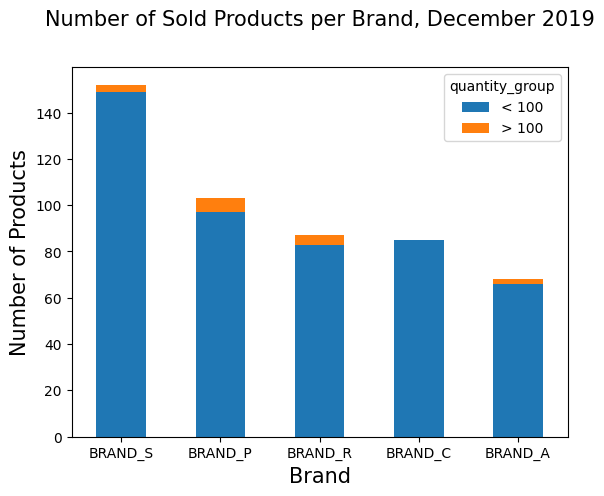

In [34]:
import matplotlib.pyplot as plt

# Membuat dataframe baru untuk agregat jumlah quantity terjual per product
data_top5brand_dec_per_product = data_top5brand_dec.groupby(['brand', 'product_id'])['quantity'].sum().reset_index()

# Menambahkan kolom baru untuk menandai product yang terjual >= 100 dan <100
data_top5brand_dec_per_product['quantity_group'] = data_top5brand_dec_per_product['quantity'].apply(lambda x: '> 100' if x >= 100 else '< 100')

# Mengurutkan dataframe berdasarkan jumlah quantity secara menurun
data_top5brand_dec_per_product.sort_values('quantity', ascending=False, inplace=True)

# Membuat referensi pengurutan brand berdasarkan banyaknya semua product
s_sort = data_top5brand_dec_per_product.groupby('brand')['product_id'].nunique().sort_values(ascending=False)

# Plot stacked barchart
data_top5brand_dec_per_product.groupby(['brand', 'quantity_group'])['product_id'].nunique().reindex(index=s_sort.index, level='brand').unstack().plot(kind='bar', stacked=True)

# Menambahkan judul dan label sumbu
plt.title('Number of Sold Products per Brand, December 2019', loc='center', pad=30, fontsize=15, color='black')
plt.xlabel('Brand', fontsize=15)
plt.ylabel('Number of Products', fontsize=15)

# Mengatur batas minimal pada sumbu y
plt.ylim(ymin=0)

# Mengatur rotasi label pada sumbu x
plt.xticks(rotation=0)

# Menampilkan grafik
plt.show()


Case 5: Murah atau mahalkah harga produk brand top 5

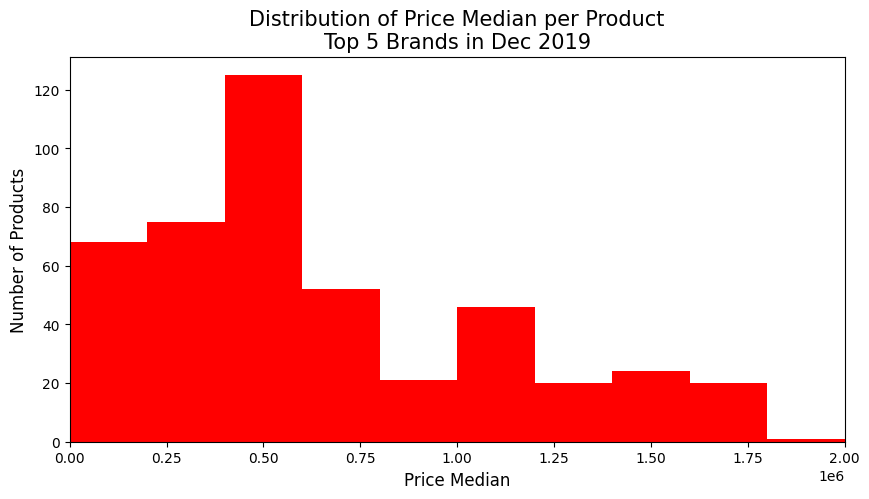

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

# Menggunakan histogram untuk menampilkan distribusi harga median per product
plt.hist(data_top5brand_dec.groupby('product_id')['item_price'].median(), bins=10, stacked=True, range=(1, 2000000), color='red')

# Menambahkan judul dan label sumbu
plt.title('Distribution of Price Median per Product\nTop 5 Brands in Dec 2019', fontsize=15, color='black')
plt.xlabel('Price Median', fontsize=12)
plt.ylabel('Number of Products', fontsize=12)

# Mengatur batas minimal dan maksimal pada sumbu x
plt.xlim(xmin=0, xmax=2000000)

# Menampilkan grafik
plt.show()


Case 6a: Korelasi quantity vs GMV

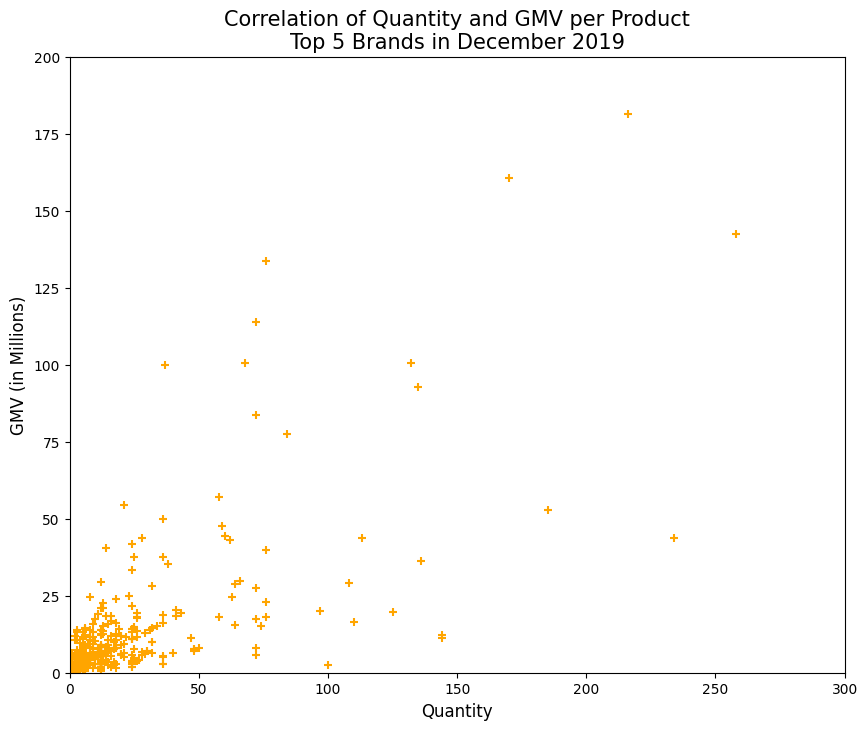

In [41]:
import matplotlib.pyplot as plt

# Agregasi per product
data_per_product_top5brand_dec = data_top5brand_dec.groupby('product_id').agg({'quantity': 'sum', 'gmv': 'sum', 'item_price': 'median'}).reset_index()

# Scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(data_per_product_top5brand_dec['quantity'], data_per_product_top5brand_dec['gmv'], marker='+', color='orange')

# Menambahkan judul dan label sumbu
plt.title('Correlation of Quantity and GMV per Product\nTop 5 Brands in December 2019', fontsize=15, color='black')
plt.xlabel('Quantity', fontsize=12)
plt.ylabel('GMV (in Millions)', fontsize=12)

# Mengatur batas minimal dan maksimal pada sumbu x dan y
plt.xlim(xmin=0, xmax=300)
plt.ylim(ymin=0, ymax=200000000)

# Mengubah label sumbu y menjadi jutaan
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000).astype(int))

# Menampilkan grafik
plt.show()


Case 6b: Korelasi median harga vs quantity

<Figure size 640x480 with 0 Axes>

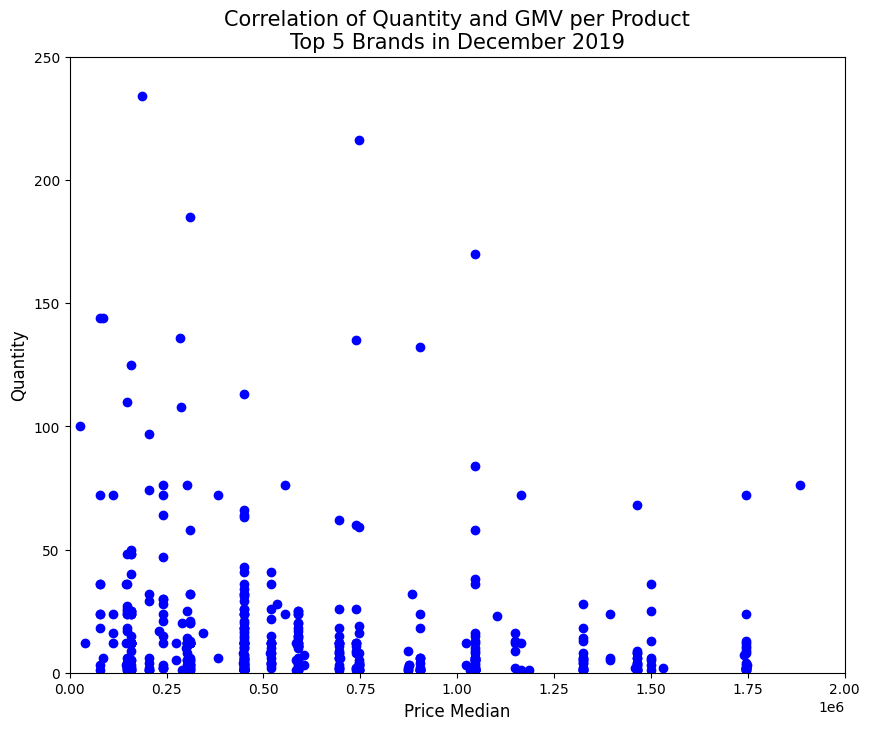

In [43]:
plt.clf()

# Agregasi per product
data_per_product_top5brand_dec = data_top5brand_dec.groupby('product_id').agg({'quantity': 'sum', 'gmv': 'sum', 'item_price': 'median'}).reset_index()

# Scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(data_per_product_top5brand_dec['item_price'], data_per_product_top5brand_dec['quantity'], marker='o', color='blue')

# Menambahkan judul dan label sumbu
plt.title('Correlation of Quantity and GMV per Product\nTop 5 Brands in December 2019', fontsize=15, color='black')
plt.xlabel('Price Median', fontsize=12)
plt.ylabel('Quantity', fontsize=12)

# Mengatur batas minimal dan maksimal pada sumbu x dan y
plt.xlim(xmin=0, xmax=2000000)
plt.ylim(ymin=0, ymax=250)

# Menampilkan grafik
plt.show()